# Introduction to Tidy Data 

**Credits:** Much of this info was pulled from Hadley Wickham's (2014) Tidy Data paper, Jean-Nicholas Hould's (2016) Tidy Data in Python post, and also a bit from Jean Francois Puget's (2016) post on Tidy Data in Python.

### What is the purpose of this presentation? 
To introduce the topic of Tidy Data and start thinking about what tools can help us get from messy-data to tidy-data. 

The following bullets are pulled from Hadley Wickham's (2014) Tidy Data paper:
 - A huge amount of effort is spent cleaning data to get it ready for analysis.
 - An important component of data cleaning: **Data Tidying**. 
 - Tidy datasets are easy to manipulate, model and visualise.
 - They have a specific structure: 
    -  **each variable** is a column, **each observation** is a row, and **each type of observational unit** is a table.**
    
### These really are going to be the takeaway messages for today:
1. Knowing that the Tidy Data format for structuring data exists (and why it is important). 
2. Understanding that the Tidy Data format can be a VERY helpful way for structuring your data and streamlining analyses.
3. And when you get data that is not structured this way (messy-data), to get you to start spending time:
    - considerding how a particular messy-dataset would look if it was in the tidy-data format, 
    - and how you can use tools to get you there (e.g., python, R, etc.).
 
![title](http://r4ds.had.co.nz/images/tidy-1.png)

In this brief presentation, **we will unpack these ideas and begin to start thinking more deeply about the benefits of Tidy-Data.**

---

# Today's Outline:
1. Quick point from Lowndes *et al* 2017 that relates to Tidy Data.
2. Hadley's insights on what someone typically needs to do with data.
3. Tidy Data Principles.
4. Tidy Data examples: Going from messy-data to tidy-data using built in functions.
5. Wrap-up: a couple of visualizations followed by questions/answers.

---

## Section I: Quick point from Lowndes et al 2017

### Tying this presentation into our Journal Article reading:
 - Lowndes *et al* focused on 3 components throughout: **Reproducibility,** Collaboration, & Communication.
 - For reproducibility **(specifically, data preperation):** There scripts/markdown became a Living Lab Notebook...
    - Lowndes *et al: "All our code is underpinned by the principles of tidy data."*

---

## Section II: Hadley Wickham's insights on what someone typically needs to do with data
Wickham discusses the "three important components of analysis: data manipulation, visualization, and modeling."
### Data Manipulation: 
Filtering, transforming, aggregating, and/or sorting your data.
### Visualization:
Important for graphical representation and especially for Exploratory Data Analysis.
### Modeling:
Typical objective of many analyses (e.g., predictive modeling, clustering, etc.).

#### <font color='red'>All of these have one thing in common: Most require, or at least are much easier to accomplish with, Tidy Datasets (input-tidy)</font>

---

## Section III: Tidy Data Principles (as laid out by Wickham).

#### Defining tidy data
The structure Wickham defines as tidy has the following attributes:

 - Each variable forms a column.
 - Each observation forms a row
 - Each type of observational unit forms a table 
 ![title](http://r4ds.had.co.nz/images/tidy-1.png)
**A few definitions:**
 - Variable: A measurement or an attribute. *Height, weight, sex, etc.*
 - Observation: All values measure on the same unit. *Each person.*
 - Value: The actual measurement or attribute. *152 cm, 80 kg, female, etc.*
 
#### Tidy Data structure plain and simply, makes your data ingestable (e.g., Machine Readable by your software)

---

## Section IV: Tidy Data examples: From messy-data to tidy-data using built in functions.

In [1]:
# import necessary packages and libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
#from os import listdir
#from os.path import isfile, join
#import glob
#import re

# magic command for having plots show up in notebook
%matplotlib inline

In [2]:
# set style for all figures that will be made throughout this notebook
sns.set_context("paper")
sns.set(font='serif')
sns.set_style("white", {"font.family": "serif","font.serif": ["Times", "Palatino", "serif"]})

### Let's start with a simple example of a messy dataset:
Tell group about this simple study... And then ask them why it's not Tidy.
 - Does each variable form a column?
 - Does each observation form a row?

**Hint:** What are the 3 variables in this simple dataset?

In [3]:
# example of a common or typical dataset seen in a presentation
messy1 = pd.DataFrame({'':['John Smith', 'Jane Doe', 'Mary Johnson'],
                     'treatment_a':[4, 6, 8],
                     'treatment_b':[11, 10, 14]})
messy1

,,treatment_a,treatment_b
0,John Smith,4,11
1,Jane Doe,6,10
2,Mary Johnson,8,14


### Taking our simple example of a messy dataset and structuring it into the Tidy Data format.
 - Does each variable form a column?
 - Does each observation form a row?

In [4]:
# use melt function to basically 'unpivot' the messy data ('wide format') into tidy data ('long format')
tidy = pd.melt(frame=messy1, id_vars='')
tidy

,,variable,value
0,John Smith,treatment_a,4
1,Jane Doe,treatment_a,6
2,Mary Johnson,treatment_a,8
3,John Smith,treatment_b,11
4,Jane Doe,treatment_b,10
5,Mary Johnson,treatment_b,14


In [5]:
# use a bit of extra parameters to add appropriate variable/column names/headers
tidy1 = pd.melt(frame=messy1, id_vars='', var_name='treatment', value_name='test_results')
tidy1

,,treatment,test_results
0,John Smith,treatment_a,4
1,Jane Doe,treatment_a,6
2,Mary Johnson,treatment_a,8
3,John Smith,treatment_b,11
4,Jane Doe,treatment_b,10
5,Mary Johnson,treatment_b,14


In [6]:
# rename blank column to 'name'
tidy1.rename(columns={'':'name'}, inplace=True)

# change treatment values to just include A or B
tidy1.replace(to_replace='treatment_a', value='A', inplace=True)
tidy1.replace(to_replace='treatment_b', value='B', inplace=True)

# preview table
tidy1

,name,treatment,test_results
0,John Smith,A,4
1,Jane Doe,A,6
2,Mary Johnson,A,8
3,John Smith,B,11
4,Jane Doe,B,10
5,Mary Johnson,B,14


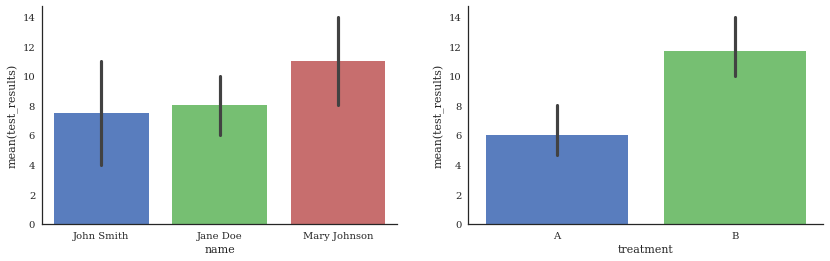

In [7]:
# initiate figure and axis objects
fig, ax=plt.subplots(1,2,figsize=(14,4))

# plot mean test result for each person, and the mean test result seperated by treatment.
sns.barplot(data=tidy1, x='name', y='test_results', palette='muted', ax=ax[0])
sns.barplot(data=tidy1, x='treatment', y='test_results', palette='muted', ax=ax[1])
sns.despine()

### Does anyone have any questions about Tidy Data so far?

---

# Now lets dive a little deeper into tidying messy datasets.
### Tidying messy datasets
Through the following examples extracted from Wickham’s paper, we’ll wrangle messy datasets into the tidy format. The goal here is not to analyze the datasets but rather prepare them in a standardized way prior to the analysis. 
### These are the five types of messy datasets (today we will focus on 1-3)

1. **Column headers are values, not variable names.**
2. **Multiple variables are stored in one column.**
3. **Variables are stored in both rows and columns.**
4. Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.

## Type I: Column headers are values, not variable names.
Pew Research Center Dataset.

This dataset explores the relationship between income and religion in the US.

### PROBLEM: <font color='red'>*The column headers are composed of the possible income values.*</font>
 -  **Important Note: ** Wickham points out that in some cases this arrangment can be extremely useful (e.g., matrix operations).
 
### SOLUTION: <font color='blue'>*Turn columns into rows (so that they will become individual instances for each observation).*</font>

**Depending on time,** we might do this interactively: Does each variable form a column? Does each observation form a row? What are the variables?

In [8]:
# read in messy Pew Research data
messy2 = pd.read_csv("./tidy-data-python-master/data/pew-raw.csv")
messy2

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


**A tidy version of this dataset is one in which the income values would not be columns headers but rather values in an income column.** 
 -  In order to tidy this dataset, we need to melt it.
 -  The pandas library has a built-in function that allows to do just that. It “unpivots” a DataFrame from a wide format to a long format. This will be a common function for data tidying.

In [9]:
# use melt function to melt table into a 'molten dataset'
tidy2 = pd.melt(frame=messy2, id_vars=["religion"], var_name="income", value_name="frequency")

# view the firt 10 rows of the molten dataset
tidy2.head(10)

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


In [10]:
# sort dataset by relegion to see more clearly what has happened
tidy2 = tidy2.sort_values(by=["religion"]) 
tidy2.head(10)

,religion,income,frequency
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


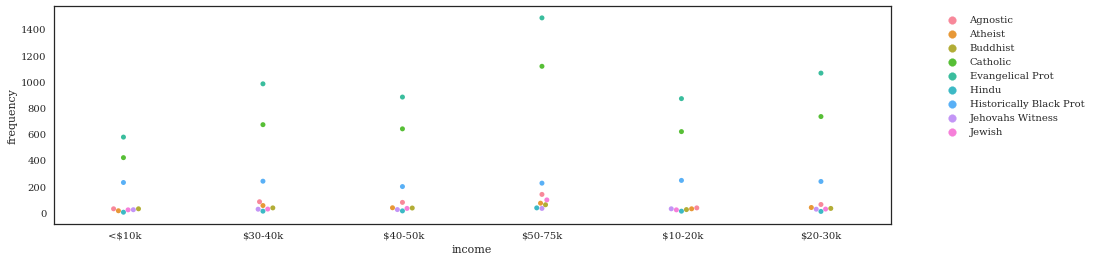

In [11]:
# initiate figure and axis objects
fig, ax=plt.subplots(figsize=(15,4))
tidy2 = tidy2.loc[tidy2['religion'] != 'Dont know/refused', : ]
sns.swarmplot(x="income", y="frequency", hue="religion", data=tidy2)
plt.legend(bbox_to_anchor=(1.05, 1))

---

## Type II: Multiple variables are stored in one column.
Tubercolosis Records from World Health Organization

This dataset documents the count of confirmed tuberculosis cases by country, year, age and sex.

### PROBLEM: <font color='red'>*Some columns contain multiple variables/values: sex and age.*</font>
 -  **Important Note: ** Often these column headers are seperated by some character (-, _, ., etc.).
 -  We've all seen or created columns like such: treatment_replicate OR sensor_5_temp (this case: sex_age).
     - **Note:** the age is a range...
 
### SOLUTION: <font color='blue'>*Melt data into Molten dataset and seperate variables into appropriate columns*</font>

In [12]:
# read in messy Tubercolosis data. This is apparently just a subset of the data, that's okay :)
messy3 = pd.read_csv("./tidy-data-python-master/data/tb-raw.csv")
messy3

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


**In order to tidy this dataset, we need to remove the different values from the header and unpivot them into rows.**
-  We’ll first need to melt the sex + age group columns into a single one. 
-  Once we have that single column, we’ll derive three columns from it: sex, age_lower and age_upper.
-  With those, we’ll be able to properly build a tidy dataset.

In [13]:
# use the melt function to start
tidy3 = pd.melt(messy3, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")
print(tidy3.shape)
tidy3.head(5)

(90, 4)


,country,year,sex_and_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [14]:
# Extract Sex, Age lower bound and Age upper bound group
tmp_tidy3 = tidy3["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand=True)  
print(tmp_tidy3.shape)
tmp_tidy3.tail(10)

(90, 3)


,0,1,2
80,f,0,14
81,f,0,14
82,f,0,14
83,f,0,14
84,f,0,14
85,f,0,14
86,f,0,14
87,f,0,14
88,f,0,14
89,f,0,14


In [15]:
# Name columns for tmp_tidy3
tmp_tidy3.columns = ["sex", "age_lower", "age_upper"]
tmp_tidy3.tail()

,sex,age_lower,age_upper
85,f,0,14
86,f,0,14
87,f,0,14
88,f,0,14
89,f,0,14


In [16]:
# Create `age`column based on `age_lower` and `age_upper`
tmp_tidy3["age"] = tmp_tidy3["age_lower"] + "-" + tmp_tidy3["age_upper"]
print(tmp_tidy3.shape)
tmp_tidy3.tail()

(90, 4)


,sex,age_lower,age_upper,age
85,f,0,14,0-14
86,f,0,14,0-14
87,f,0,14,0-14
88,f,0,14,0-14
89,f,0,14,0-14


In [17]:
# Merge tidy3 with tmp_tidy3 
tidy3 = pd.concat([tidy3, tmp_tidy3], axis=1)
print(tidy3.shape)
tidy3.head(10)

(90, 8)


,country,year,sex_and_age,cases,sex,age_lower,age_upper,age
0,AD,2000,m014,0.0,m,0,14,0-14
1,AE,2000,m014,2.0,m,0,14,0-14
2,AF,2000,m014,52.0,m,0,14,0-14
3,AG,2000,m014,0.0,m,0,14,0-14
4,AL,2000,m014,2.0,m,0,14,0-14
5,AM,2000,m014,2.0,m,0,14,0-14
6,AN,2000,m014,0.0,m,0,14,0-14
7,AO,2000,m014,186.0,m,0,14,0-14
8,AR,2000,m014,97.0,m,0,14,0-14
9,AS,2000,m014,NaN,m,0,14,0-14


In [18]:
# Drop unnecessary columns and rows, drop Na values, and sort data to finalize data tidying
tidy3_final = tidy3.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
tidy3_final = tidy3_final.dropna()
tidy3_final.head()

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
1,AE,2000,2.0,m,0-14
2,AF,2000,52.0,m,0-14
3,AG,2000,0.0,m,0-14
4,AL,2000,2.0,m,0-14


In [19]:
tidy3_final = tidy3_final.sort_values(by=["country", "year", "sex", "age"])
tidy3_final.head(10)

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
10,AD,2000,0.0,m,15-24
20,AD,2000,1.0,m,25-34
30,AD,2000,0.0,m,35-44
40,AD,2000,0.0,m,45-54
50,AD,2000,0.0,m,55-64
81,AE,2000,3.0,f,0-14
1,AE,2000,2.0,m,0-14
11,AE,2000,4.0,m,15-24
21,AE,2000,4.0,m,25-34


---

## Type III: Variables are stored in both rows and columns.
Global Historical Climatology Network Dataset

This dataset represents the daily weather records for a weather station (MX17004) in Mexico for five months in 2010.

### PROBLEM: <font color='red'>*Variables are stored in both rows (tmin, tmax) and columns (days)*</font>
 -  **Important Note: ** Wickham states that "the most complicated form of messy data when variables are stored in both rows and columns.
 
### SOLUTION: <font color='blue'>*Analyze situation and identify issues. Then, determine what Tidy Data would look like.*</font>

As Wickham describes this dataset: "It has variables in individual columns (id, year, month), spread across columns (day, d1-d31) and across rows (tmin,tmax) (minimum and maximum temperature). Months with less than 31 days have structural missing values for the last day(s) of the month."

**Based on what we've learned so far about the principles of Tidy Data, what is wrong with this table?**

In [20]:
# read in messy climate/sensor data. Again, this is just a subset of the data, that's okay :)
messy4 = pd.read_csv("./tidy-data-python-master/data/weather-raw.csv")
messy4

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the values are missing.  However, filtering the NaN values isn't possible in this messy form. We need to melt the dataframe first.

In [21]:
molten = pd.melt(messy4, 
                 id_vars=['id', 'year','month','element',],
                 var_name='day');
molten.dropna(inplace=True)
molten = molten.reset_index(drop=True)
molten

,id,year,month,element,day,value
0,MX17004,2010,2,tmax,d2,27.3
1,MX17004,2010,2,tmin,d2,14.4
2,MX17004,2010,2,tmax,d3,24.1
3,MX17004,2010,2,tmin,d3,14.4
4,MX17004,2010,3,tmax,d5,32.1
5,MX17004,2010,3,tmin,d5,14.2


In [22]:
def f(row):    
    return "%d-%02d-%02d" % (row['year'], row['month'], int(row['day'][1:]))
    
molten['date'] = molten.apply(f,axis=1)
molten = molten[['id', 'element','value','date']]
molten

,id,element,value,date
0,MX17004,tmax,27.3,2010-02-02
1,MX17004,tmin,14.4,2010-02-02
2,MX17004,tmax,24.1,2010-02-03
3,MX17004,tmin,14.4,2010-02-03
4,MX17004,tmax,32.1,2010-03-05
5,MX17004,tmin,14.2,2010-03-05


In [23]:
# use pivot to get tmin and tmax into seperate columns. And to get appropriate values for each observation.
tidy4 = molten.pivot(index='date',columns='element',values='value')
tidy4 = tidy4.reset_index()
tidy4['id'] = 'MX17004'

# reorder columns
tidy4 = tidy4[['date', 'id', 'tmin', 'tmax']]

# preview table
tidy4

element,date,id,tmin,tmax
0,2010-02-02,MX17004,14.4,27.3
1,2010-02-03,MX17004,14.4,24.1
2,2010-03-05,MX17004,14.2,32.1


## Type I: Column headers are values, not variable names (another example).

Billboard Top 100 Dataset.

This dataset represents the weekly rank of songs from the moment they enter the Billboard Top 100 to the subsequent 75 weeks.

### PROBLEM: <font color='red'>*The column headers are composed of values: the week number (x1st.week, …).*</font>
 -  If a song is in the Top 100 for less than 75 weeks, the remaining columns are filled with missing values.
 -  This is another common issue: **Recording regularly spaced observations over time and using columns for time intervals.**
 
### SOLUTION: <font color='blue'>*Turn columns into rows followed by a bit of data cleaning.*</font>

In [24]:
# read in the messy Billboard data
messy3 = pd.read_csv("./tidy-data-python-master/data/billboard.csv", encoding="mac_latin2")
messy3.head(8)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**A tidy version of this dataset is one without the week’s numbers as columns but rather as values of a single column.** 
 -  In order to do so, we’ll melt the weeks columns into a single date column.
 -  We will create one row per week for each record. If there is no data for the given week, we will not create a row.

## Section V: Wrap-up: a couple of visualizations followed by questions/answers.